In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
df = pd.read_csv("SOC dataset.csv")

In [3]:
df.head(2)

,Capacity 1C,Voltage 1C,Capacity 5C,Voltage 5C,Capacity 15C,Voltage 15C,Capacity 20C,Voltage 20C,Unnamed: 8
0,4.73,12.60,2.70,12.30,2.70,11.78,2.70,11.40,NaN
1,8.78,12.53,6.76,12.16,8.78,11.69,8.78,11.31,NaN


In [4]:
df1 = df[['Capacity 1C', 'Voltage 1C']]
df5 = df[['Capacity 5C', 'Voltage 5C']]
df15 = df[['Capacity 15C', 'Voltage 15C']]
df20 = df[['Capacity 20C', 'Voltage 20C']]

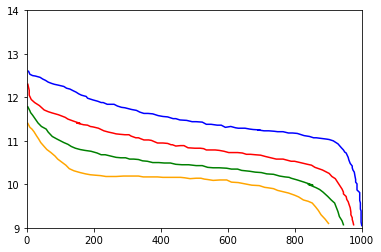

In [5]:
fig = plt.figure()

for frame in [df1, df5, df15, df20]:
    if str(frame) == str(df1):
        plt.plot(frame['Capacity 1C'], frame['Voltage 1C'], color = 'blue')
    elif str(frame) == str(df5):
        plt.plot(frame['Capacity 5C'], frame['Voltage 5C'], color = 'red')
    elif str(frame) == str(df15):
        plt.plot(frame['Capacity 15C'], frame['Voltage 15C'], color = 'green')
    else:
        plt.plot(frame['Capacity 20C'], frame['Voltage 20C'], color = 'orange')

plt.xlim(0,1000)
plt.ylim(9,14)
plt.show()

In [6]:
df1.dropna(inplace=True)
df5.dropna(inplace=True)
df15.dropna(inplace=True)
df20.dropna(inplace=True)

In [10]:
arr1 = np.polyfit(x = df1['Capacity 1C'], y = df1['Voltage 1C'], deg = 5, rcond=None, full=False, w=None, cov=False)
arr5 = np.polyfit(x = df5['Capacity 5C'], y = df5['Voltage 5C'], deg = 5, rcond=None, full=False, w=None, cov=False)
arr15 = np.polyfit(x = df15['Capacity 15C'], y = df15['Voltage 15C'], deg = 5, rcond=None, full=False, w=None, cov=False)
arr20 = np.polyfit(x = df20['Capacity 20C'], y = df20['Voltage 20C'], deg = 5, rcond=None, full=False, w=None, cov=False)


In [47]:
print('For 1C, 5 degree polynomial equation has weights:', arr1)
print('For 5C, 5 degree polynomial equation has weights:', arr5)
print('For 15C, 5 degree polynomial equation has weights:', arr15)
print('For 20C, 5 degree polynomial equation has weights:', arr20)

For 1C, 5 degree polynomial equation has weights: [-1.00746645e-13  2.24214328e-10 -1.76140104e-07  5.98985998e-05
 -1.04708366e-02  1.27592209e+01]
For 5C, 5 degree polynomial equation has weights: [-7.21773549e-14  1.61847788e-10 -1.32968847e-07  5.01943554e-05
 -1.03052130e-02  1.21750390e+01]
For 15C, 5 degree polynomial equation has weights: [-6.38239495e-14  1.48343631e-10 -1.31650391e-07  5.59661736e-05
 -1.23770603e-02  1.17889792e+01]
For 20C, 5 degree polynomial equation has weights: [-6.27059427e-14  1.53535615e-10 -1.47628043e-07  6.81540011e-05
 -1.51371587e-02  1.14788789e+01]


In [48]:
y1 = lambda x: arr1[0]*x**5 + arr1[1]*x**4 + arr1[2]*x**3 + arr1[3]*x**2 + arr1[4]*x + arr1[5]
y5 = lambda x: arr5[0]*x**5 + arr5[1]*x**4 + arr5[2]*x**3 + arr5[3]*x**2 + arr5[4]*x + arr5[5]
y15 = lambda x: arr15[0]*x**5 + arr15[1]*x**4 + arr15[2]*x**3 + arr15[3]*x**2 + arr15[4]*x + arr15[5]
y20 = lambda x: arr20[0]*x**5 + arr20[1]*x**4 + arr20[2]*x**3 + arr20[3]*x**2 + arr20[4]*x + arr20[5]

In [51]:
print('Energy for 1C is:', round(integrate.quad(y1, 0, 1000)[0],0), 'mWh')
print('Energy for 5C is:', round(integrate.quad(y5, 0, 1000)[0],0), 'mWh')
print('Energy for 15C is:', round(integrate.quad(y15, 0, 1000)[0],0), 'mWh')
print('Energy for 20C is:', round(integrate.quad(y20, 0, 1000)[0],0), 'mWh')

Energy for 1C is: 11507.0 mWh
Energy for 5C is: 10852.0 mWh
Energy for 15C is: 10375.0 mWh
Energy for 20C is: 9977.0 mWh


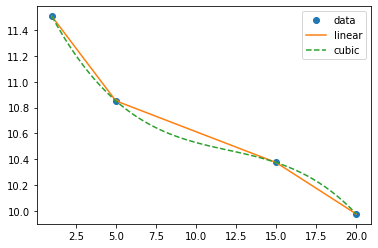

In [65]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
x = [1,5,15,20]
y = [11.507,10.852,10.375,9.977]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(1,20)

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

In [75]:
interpolation = np.polyfit(x = x, y = y, deg = 3, rcond=None, full=False, w=None, cov=False)
interpolation

AttributeError: module 'numpy' has no attribute 'fit'

In [71]:
# Learn about API authentication here: https://plotly.com/python/getting-started
# Find your api_key here: https://plotly.com/settings/api

import chart_studio.plotly as py
import plotly.graph_objs as go

# Scientific libraries
import numpy as np
from scipy.optimize import curve_fit


x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

def exponenial_func(x, a, b, c):
    return a*np.exp(-b*x)+c


popt, pcov = curve_fit(exponenial_func, x, y, p0=(1, 1e-6, 1))

xx = np.linspace(300, 6000, 1000)
yy = exponenial_func(xx, *popt)

# Creating the dataset, and generating the plot
trace1 = go.Scatter(
                  x=x,
                  y=y,
                  mode='markers',
                  marker=go.Marker(color='rgb(255, 127, 14)'),
                  name='Data'
                  )

trace2 = go.Scatter(
                  x=xx,
                  y=yy,
                  mode='lines',
                  marker=go.Marker(color='rgb(31, 119, 180)'),
                  name='Fit'
                  )

annotation = go.Annotation(
                  x=2000,
                  y=100,
                  text='$\textbf{Fit}: 163.56e^{-0.00097x} - 1.16$',
                  showarrow=False
                  )
layout = go.Layout(
                title='Exponential Fit in Python',
                plot_bgcolor='rgb(229, 229, 229)',
                  xaxis=go.XAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  yaxis=go.YAxis(zerolinecolor='rgb(255,255,255)', gridcolor='rgb(255,255,255)'),
                  annotations=[annotation]
                )

data = [trace1, trace2]
fig = go.Figure(data=data, layout=layout)

py.plot(fig, filename='Exponential-Fit-in-python')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:434: DeprecationWarning: plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:143: DeprecationWarning: plotly.graph_objs.Annotation is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Annotation
  - plotly.graph_objs.layout.scene.Annotation

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/graph_objs/_deprecations.py:544: DeprecationWarning: plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_obj

PlotlyRequestError: Authentication credentials were not provided.